In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"ArogyaSetu.csv")

In [4]:
df.head()

,STATE,CONFIRMED,RECOVERED,DEATHS
0,MAHARASHTRA,62228,26997,2098
1,TAMIL NADU,20246,11313,154
2,NCT OF DELHI,17386,7846,398
3,GUJRAT,15934,8611,980
4,RAJASTHAN,8365,5244,184


In [5]:
df['RECOVERY RATE(%)'] = round((df['RECOVERED'].astype('float')/df['CONFIRMED'])*100)

In [6]:
df['DEATH RATE(%)'] = round((df['DEATHS'].astype('float')/df['CONFIRMED'])*100)

In [7]:
df.head()

,STATE,CONFIRMED,RECOVERED,DEATHS,RECOVERY RATE(%),DEATH RATE(%)
0,MAHARASHTRA,62228,26997,2098,43.0,3.0
1,TAMIL NADU,20246,11313,154,56.0,1.0
2,NCT OF DELHI,17386,7846,398,45.0,2.0
3,GUJRAT,15934,8611,980,54.0,6.0
4,RAJASTHAN,8365,5244,184,63.0,2.0


In [40]:
df.corrwith(df['CONFIRMED'])

CONFIRMED           1.000000
RECOVERED           0.992856
DEATHS              0.944848
RECOVERY RATE(%)    0.064968
DEATH RATE(%)       0.366536
dtype: float64

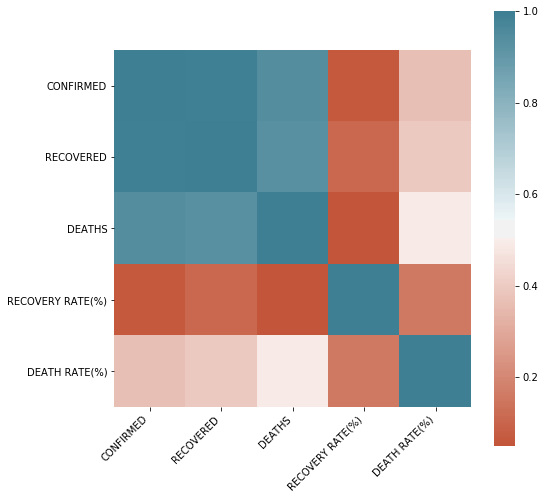

In [44]:
plt.figure(figsize=(8, 8))

ax = sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), square=True)

labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

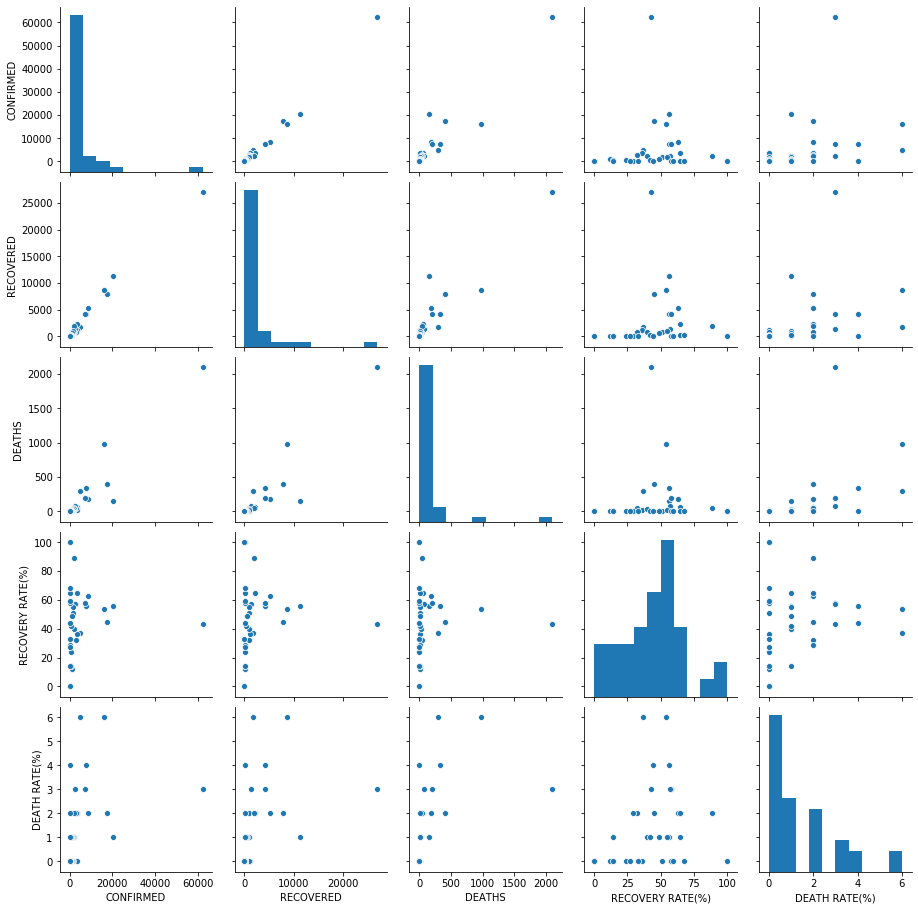

In [55]:
sns.pairplot(data=df)

In [13]:
LABELS=df['STATE'].tolist()

Text(0, 0.5, 'COUNT')

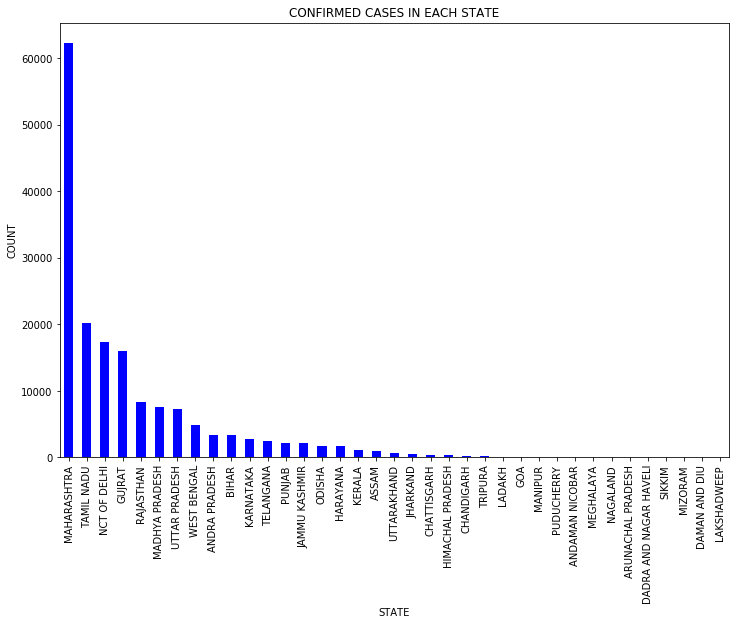

In [14]:
df['CONFIRMED'].plot(kind='bar',figsize=(12,8),color='blue',align='center')
plt.xticks(range(len(df['CONFIRMED'])),LABELS)
plt.title('CONFIRMED CASES IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

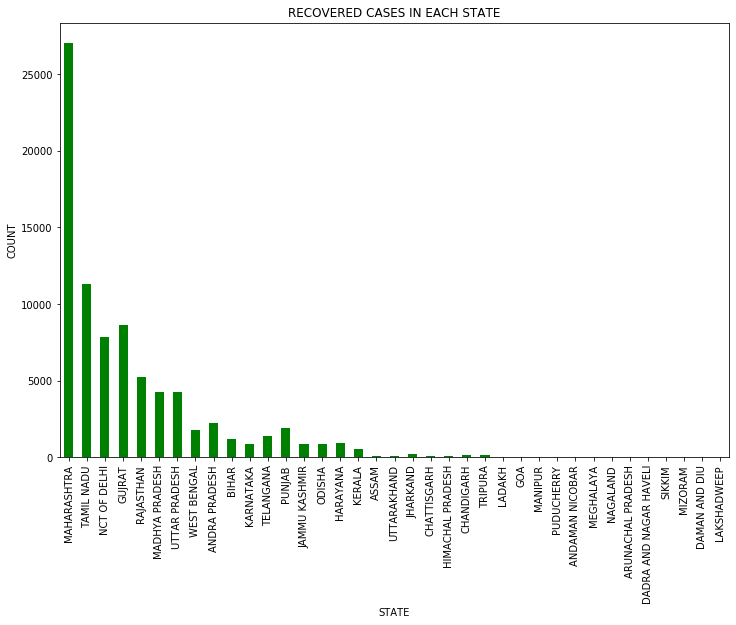

In [15]:
df['RECOVERED'].plot(kind='bar',figsize=(12,8),color='green',align='center')
plt.xticks(range(len(df['RECOVERED'])),LABELS)
plt.title('RECOVERED CASES IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

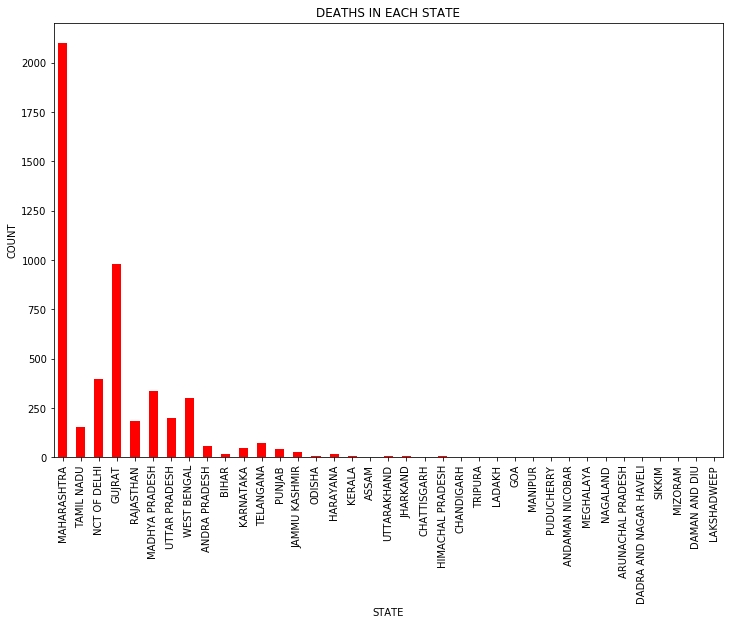

In [17]:
df['DEATHS'].plot(kind='bar',figsize=(12,8),color='red',align='center')
plt.xticks(range(len(df['DEATHS'])),LABELS)
plt.title('DEATHS IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

In [18]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

X = df[['CONFIRMED']]
Y = df[['RECOVERED']]

model1 = lm.fit(X,Y)

print(model1)
Yhat = lm.predict(X)
print('The coeficient for our model is as follows',lm.coef_)
print('The intercept for our model is as follows',lm.intercept_)
choice = int(input('Enter the choice of data you want looking at the data set:'))
print('The recovery estimation for ' + str(df['STATE'].loc[choice]) + ' is ' + str(Yhat[choice]))  # enter any value to predict the value of Y
#for finding R^2 error
print('The R sqaure error is :',lm.score(X,Y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The coeficient for our model is as follows [[0.45063227]]
The intercept for our model is as follows [171.33307962]


Enter the choice of data you want looking at the data set: 2


The recovery estimation for NCT OF DELHI is [8006.02567015]
The R sqaure error is : 0.9857632872853181


In [22]:
#for finding mean squared error that is MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['RECOVERED'].astype('float'),Yhat)
print("The mean squared error is :",mse)

The mean squared error is : 343176.2286650601


Text(0.5, 1.0, 'Regression Plot')

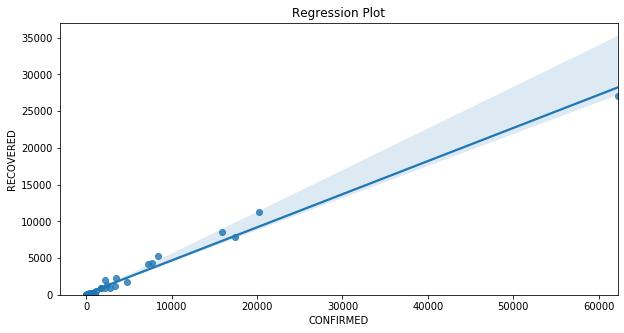

In [23]:
#regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=df['CONFIRMED'].astype('float'),y=df['RECOVERED'].astype('float'),data=df, )
plt.ylim(0,)
plt.title('Regression Plot')

Text(0.5, 1.0, 'Residual Plot')

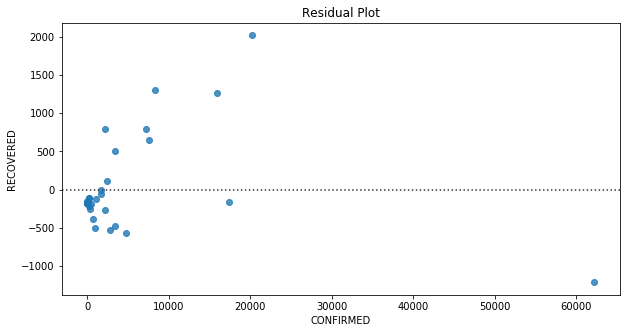

In [24]:
#residual plot
plt.figure(figsize=(10,5))
sns.residplot(df['CONFIRMED'].astype('float'),df['RECOVERED'].astype('float'),data=df)
plt.title('Residual Plot')

Text(0, 0.5, 'RECOVERED')

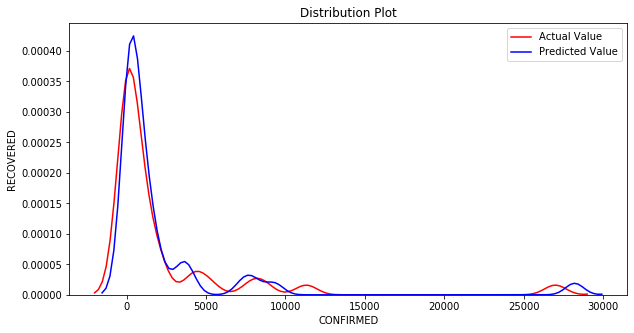

In [25]:
#distribution plot
plt.figure(figsize=(10,5))
ax1=sns.distplot(df['RECOVERED'].astype('float'),hist=False,color='red',label='Actual Value')
sns.distplot(Yhat,hist=False,color='blue',label='Predicted Value',ax=ax1)
plt.title('Distribution Plot')
plt.xlabel('CONFIRMED')
plt.ylabel('RECOVERED')

In [49]:
#MULTIPLE REGRESSION
#LINEAR REGRESSION
#Y:RESPONSE VARIABLE AND X:PREDICTOR VARIABLE
#y=b0+b1*x
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
Z = df[['CONFIRMED','DEATHS']]
Y = df[['RECOVERED']]
model2 = lm1.fit(Z,Y)
print(model2)
Yhat1 = lm1.predict(Z)
print('The coeficient for our model is as follows',lm1.coef_)
print('The intercept for our model is as follows',lm1.intercept_)

choice1=int(input("Enter the state depending ont the data set:"))
print('The prediction for the recovery of ' + str(df['STATE'].loc[choice1]) + ' is '+ str(Yhat1[choice1]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The coeficient for our model is as follows [[ 0.4862069  -1.08994266]]
The intercept for our model is as follows [155.54804208]


Enter the state depending ont the data set: 3


The prediction for the recovery of GUJRAT is [6834.62490966]


Text(0, 0.5, 'RECOVERED')

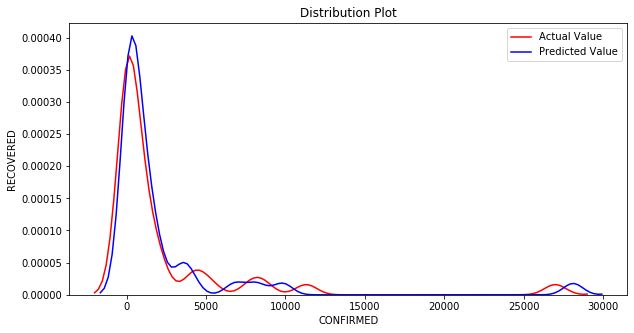

In [50]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(df['RECOVERED'].astype('float'),hist=False,color='red',label='Actual Value')
sns.distplot(Yhat1,hist=False,color='blue',label='Predicted Value',ax=ax1)
plt.title('Distribution Plot')
plt.xlabel('CONFIRMED')
plt.ylabel('RECOVERED')